Affichage du couleur crée dans un cercle


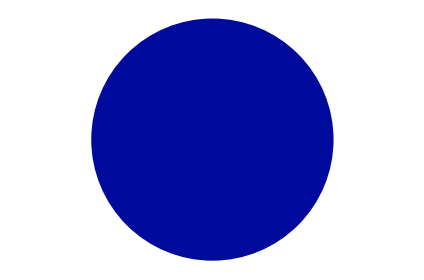

les valeurs de R,G et B sont respectivement de:R=0 G=10  B=156


Version sombre de l'objet couleur


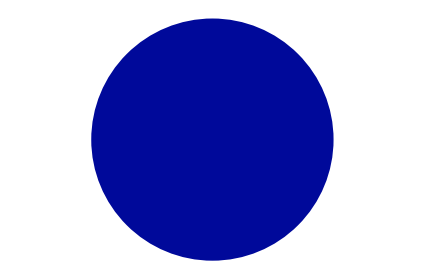



le resultat de la comparaison des deux couleurs est False


la luminance de l'objet couleur est 23.653999999999996


Couleur Nouvellement crée


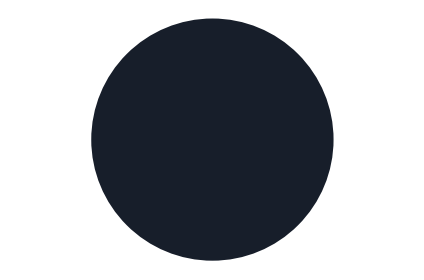



le resultat de la comptabilité des deux couleurs est False




Affichage du couleur obtenu apres l'addition


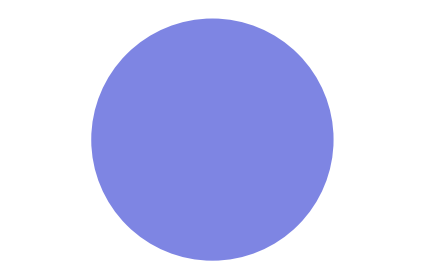

In [7]:
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.image as mpimg

## Creer votre propre Type de données abstrait Couleur sous python avec les caractériistiques suivants:
class Couleur:
    
    '''
    Constructeur à 3 paramétres qui represente les valeurs entiéres des différentes couleurs
    '''
    def __init__(self, R, G, B, name = None):
        
        self.R = int(R)
        self.G = int(G)
        self.B = int(B)
        
    
    '''
    Creer une couleur à partir d'une liste
    '''
    @staticmethod
    def creerCouleur(listeRGB):
        couleur = Couleur(listeRGB[0], listeRGB[1], listeRGB[2])
        return couleur
    
    '''
    Recupération de l'intensite de la couleur rouge
    '''
    def getR(self):
        return self.R
    
    '''
    Recupération de l'intensite de la couleur verte
    '''
    def getG(self):
        return self.G
    
    '''
    Recupération de l'intensite de la couleur verte
    '''
    def getB(self):
        return self.B
    
    
    
    '''
    Version brillante de cet objet couleur
    Il faut caculer le meme pourcentage de R,G,B
    Ajouter ces valeurs aux valeurs R,G,B de l'objet couleur originel
    Retourne un objet couleur
    '''
    
    def brighter(self, pourcentage):
        
        R = self.getR()*(1+pourcentage)
        G = self.getG()*(1+pourcentage)
        B = self.getB()*(1+pourcentage)
        
        return Couleur(int(R), int(G), int(B))
    
    
    '''
    Version sombre de cet objet couleur
    
    Il suffit de multiplier toutes les composantes R, G, B par le pourcentage passé en paramétre
    
    https://graphicdesign.stackexchange.com/questions/75417/how-to-make-a-given-color-a-bit-darker-or-lighter
    
    Retourne un objet couleur
    ''' 
    def darker(self,pourcentage):
        
        R = self.getR()*pourcentage
        G = self.getG()*pourcentage
        B = self.getB()*pourcentage
        return Couleur(int(R), int(G), int(B))
    
    
    '''
    Chaine de caractére representant cet objet couleur
    Retourne un string contenant les valeurs des composantes R,G,B
    '''
    def toString(self):
        
        string=print("les valeurs de R,G et B sont respectivement de:"
                     +"R="+str(self.getR())+" "
                     +"G="+str(self.getG())+" "+" B="+str(self.getB()))
        return string
    
    '''
    Comparaison de cet objet couleur avec color
    Retourne un booloean
    '''
    
    def equals(self,color):
        return self.getR() == color.getR() and self.getG() == color.getG() and self.getB() == color.getB()
        
    '''
     Calcul de la Luminance. La qualité des 
     images dans les écrans plasmas modernes est une combinaison linéaire des trois couleurs et est définie par
     l'equation Y = 0.299r + 0.587g + 0.114b
     
    '''
    def luminance(self):
        
        Y = (0.299*self.getR()) + (0.587*self.getG()) + (0.114*self.getB())
        return Y
    
    
    '''
     Calcul du niveau de gris. Il faut remplacer chaque intensité de couleur par la valeur entiére de la luminance.
     Il faudra créer une nouvelle couleur avec des intensités égales à la luminance
    '''
    
    def grayScale(self):
        
        self.R = int(self.luminance())
        self.G = int(self.luminance())
        self.B = int(self.luminance())
        gris=Couleur(self.R, self.G, self.B)
        return gris
    
    
    '''
     Compatibilité deux couleurs. Deux couleurs sont compatibles si la différence de leur luminance fait au moins 128
     Retourne un boolean qui vaut true si les deux couleurs sont compatibles et false sinon
    '''
    def compatible(self, couleur):
        
        if self.luminance() - couleur.luminance() >= 128:
            return True
        else:
            return False
        
    '''
     Addition de couleur
    '''
    def add(self, col):
        return Couleur((self.getR() + col.getR())/2, (self.getG() + col.getG())/2, (self.getB() + col.getB())/2)
    
    
    '''
    Fonction permettant d'afficher une couleur dans un cercle. Vous pouvez l'utiliser.
    '''
    def showColor(self):
        fig, ax = plt.subplots()
        # create a grid to plot the color
        grid = np.mgrid[0.2:0.8:3j, 0.2:0.8:3j].reshape(2, -1).T
        # add a circle
        circle = mpatches.Circle(grid[0], 0.05, ec="none",color=(self.R/255,self.G/255,self.B/255))
        ax.add_patch(circle)
        #ax.add_line(line)

        plt.axis('equal')
        plt.axis('off')
        plt.tight_layout()

        plt.show()
        
def main():#Programme principale
    ###Creation de l'objet couleur
    col=Couleur(0,10,156)
    
    ###Creation d'une couleur a partir d'une liste
    liste= (0,10,156)
    colL = Couleur.creerCouleur(liste)
    print("Affichage du couleur crée dans un cercle")
    colL.showColor() ###Affichage du couleur crée dans un cercle
    
    ###Affichage d'une chaine de caractere comportant les valeurs entieres des composants du couleur
    col.toString()
    print("\n")
    
    ###Version Sombre de l'objet couleur
    print("Version sombre de l'objet couleur")
    d=col.darker(0.99) ###le valeur en parametre represente le pourcentage compris entre 0 et 1
    d.showColor()
    print("\n")
    
    ###Comparaison de cet objet couleur avec color
    color=Couleur(0,100,205)
    a=col.equals(color)
    print("le resultat de la comparaison des deux couleurs est",a)
    print("\n")
    
    ###Calcul de la Luminance de l'objet col
    l=col.luminance()
    print("la luminance de l'objet couleur est",l)
    print("\n")
    
    ###Creation d'une nouvelle objet couleur avec des intensités egales a la luminance
    Newcolor=col.grayScale()
    print("Couleur Nouvellement crée")
    Newcolor.showColor() ###Affichage du couleur nouvellement crée
    print("\n")
    
    ###Verification de la comptabilité de deux couleurs(prenons ici l'exemple des deux couleurs crees)
    c=col.compatible(colL)
    print("le resultat de la comptabilité des deux couleurs est",c)
    print("\n")
    
    ###Addition de deux couleurs
    couleur1=Couleur(152,17,200)
    couleur2=Couleur(100,250,255)
    a=couleur1.add(couleur2)
    print("\n")
    
    ###Affichage du couleur obtenu apres l'addition
    print("Affichage du couleur obtenu apres l'addition")
    a.showColor()
    
main()


la hauteur de l'image est 407
la largeur est  398
#############################Affichage de l'image#########################


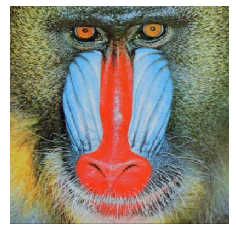

In [2]:
## Image Processing
class Picture:
    '''
    Creer une image à partir d'un fichier en utilisant la fonction imread() de matplotlig.image ou plus généralement la 
    librairie Pillow
    '''
    def __init__(self,nomFichier = None,H = None, W = None):
        if nomFichier == None:
                
            '''
            Creer une image blanche de hauteur H et de largeur W
            '''
            self.H = H
            self.W = W
            self.img = np.zeros((H,W,3), dtype = np.uint8) 
        else:
                
            '''
            Creer une image à partir d'un fichier
            '''
            self.img = mpimg.imread(nomFichier) 
            self.img = self.img[:,:,:3].copy()          #création d'une image à 3 plans
            self.img = (self.img*255).astype(np.uint8)  #np.uint8 image en 8octets
            self.H = self.img.shape[1] 
            self.W = self.img.shape[0]
        
    
    '''
    Retourne la hauteur H
    '''
    def getH(self):
        return self.H
    '''
    Retourne la largeur W
    '''
    def getW(self):
        return self.W
    '''
    Retourne le tableau numpy constituant l'image
    '''
    def getImg(self):
        return self.img
    
        '''
    Retourne les couleurs R,G, B sous forme de liste du pixel à la ligne row et la colonne col
    '''
    def getCouleur(self,row, col):
        listeP = self.getImg()[row, col]
        return Couleur(listeP[0], listeP[1], listeP[2])     
        
                                 
    '''
    Modifie les couleurs R,G,B du pixel à la ligne row et la colonne col
    '''
    def setCouleur(self,row, col,couleur):
        listeP=[couleur.R, couleur.G, couleur.B]
        self.img[row, col] = listeP
        
    '''
    Affiche une image
    '''
    def affiche(self):
        plt.imshow(self.img)
        plt.axis("off")
        plt.show()
    '''
    Sauve  une image dans un fichier png
    '''
    def save(self, nomFichier):
        plt.imsave(nomFichier, self.img, format = 'png')
   
   #########programme principal#####################

   # on Cree une image à partir d'un fichier babouin.png en utilisant la fonction imread() de matplotlig.image 
     
p1=Picture("babouin.png")

 # On Retourne la hauteur H
print("la hauteur de l'image est",p1.getH())

# Retourne la largeur W
print("la largeur est ",p1.getW())

#Retourne le tableau numpy constituant l'image
p1.getImg

#On  Retourne les couleurs R,G, B sous forme de liste du pixel à la ligne 100 et la colonne 120
p1.getCouleur(100,120)


###On  Modifie les couleurs R,G,B du pixel à la ligne 80 et la colonne 95
couleur=Couleur(17,128,210)
p1.setCouleur(80,95, couleur)


#Affichage del'image
print("#############################""Affichage de l'image#########################")
p1.affiche()

#Sauvegarde de l'image  dans un fichier babouin2.png
p1.save("babouin2")

###############Convertir une image couleur en grayscale#############


         Image Originale              :


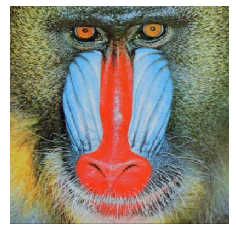

L'image convertie en grayScale:


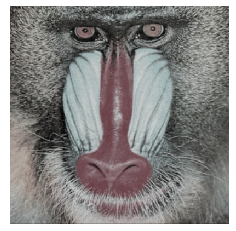

Inversion des proportions de l'image originale


         Image Originale              :


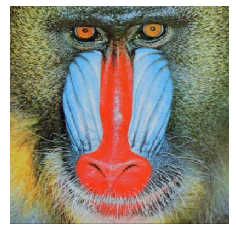

L'image crée inverséé:


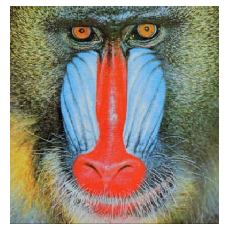

Separation des 3 couleurs de l'image originale


         Image Originale              :


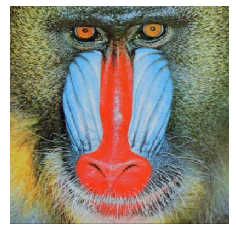

Les 3 couleurs separés:


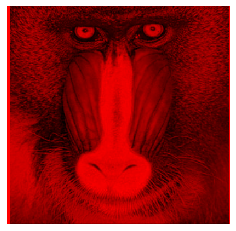

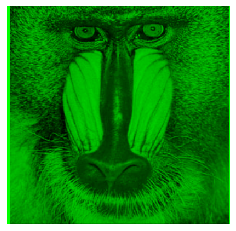

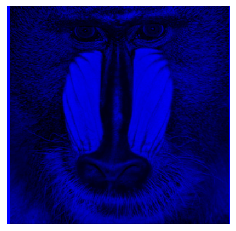

#########################Filtrage de l'image Originale#####################


         Image Originale              :


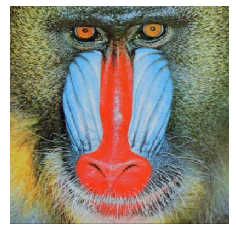

##############Image Filtré de glace###################


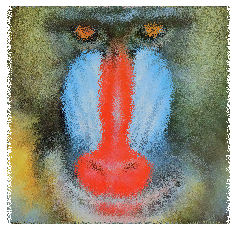



Median and Mean Filter


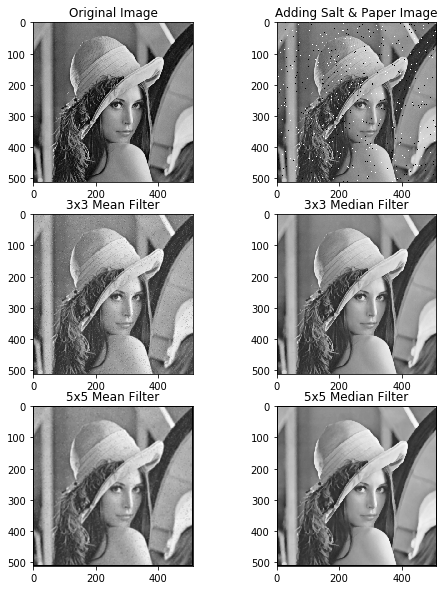

In [6]:
## Image processing
class ImageProcessing:
    def __init__(self,image):
        self.image = image
    '''
    Helper function
    '''
    def __calGray__(listePixel):
        A = math.floor(0.299*listePixel[0] + 0.587*listePixel[1] + 0.114*listePixel[2])
        return np.ndarray([A,A,A])
        
    '''
     Transformer en grayscale et visualiser l'image et sa transformée
     Appliquer les fonctions map, reduce ou filter pour reduire la complexite
    '''
    def transformGrayscaleMap(self):
        grayPicture = Picture(None,self.image.W,self.image.H)
        grayPicture.image = map(self.__calGray__,self.image.img[:,:])
        return grayPicture        
    '''
     Transformer en grayscale et visualiser l'image et sa transformée
     Une classe gloutonne avec des boucles for
    '''
    def transformGrayscaleGlouton(self):
        img = self.image
        w = img.getW()
        h = img.getH()
        trans = Picture(None,w, h)
        for col in range(w):
            for row in range(h):
                couleur = img.getCouleur(col, row)
                couleur.grayScale()
                trans.setCouleur(col, row, couleur)
        return trans.affiche()
                     
    '''
     Creer une image en inversant les proportions de l'image source. Afficher les deux images
    '''
    def transformScale(self):
        Img = self.image
        w= Img.getH()
        h= Img.getW()
        transform = Picture(None, w, h)
        for transformC in range(w):
            for transformR in range(h):
                ImgC = transformC * h  / w
                ImgR = transformR * w / h
                color = Img.getCouleur(int(ImgC), int(ImgR))
                transform.setCouleur(transformC, transformR, color)       
        return transform.affiche()
        
    '''
    Separer les couleurs d'une image et visualiser les trois couleurs
    '''
    def separerCouleur(self):
        Img = self.image
        w= Img.getW()
        h= Img.getH()
        R= Picture(None, w, h)
        G= Picture(None, w, h)
        B= Picture(None, w, h)
        for col in range(w): 
            for row in range(h):
                couleur =Img.getCouleur(col, row)
                rougeUnik = couleur.getR()
                vertUnik = couleur.getG()
                bleuUnik = couleur.getB()
                R.setCouleur(col, row, Couleur(rougeUnik, 0, 0))
                G.setCouleur(col, row, Couleur(0, vertUnik, 0))
                B.setCouleur(col, row, Couleur(0, 0, bleuUnik))
                
        RS=R.affiche()
        GS=G.affiche()
        BS=B.affiche()
        return RS,GS,BS
        
    '''
    Filtre de glace: Affecter à chaque pixel p la couleur d'un pixel voisin choisi alétoirement
    (Les coordonnées du pixel et de p doivent différer d'au plus 5).
    Afficher les deux images 
    '''
    def filtreGlass(self):
        img= self.image
        w = img.getW()
        h= img.getH()
        filtre = Picture(None,w,h)
        for col in range(w):
            for row in range(h):
                newC = (w  + col + random.randint(-5, 5)) % w
                newR = (h + row + random.randint(-5, 5)) % h
                couleur = img.getCouleur(newC, newR)
                filtre.setCouleur(col, row, couleur)
        return filtre.affiche()
        ##########################Programme Principal##########################
###Creation d'un objet image P2
p2=Picture("babouin.png")
###ImageProcessing
image = ImageProcessing(p2)
##### Modiﬁcation des niveaux de gris ###
print("###############Convertir une image couleur en grayscale#############")
print("\n")      
print("         Image Originale              :")
p2.affiche()
print("L'image convertie en grayScale:")
image.transformGrayscaleGlouton()

###Creation d'une image en inversant les proportions de l'image source p2
print("Inversion des proportions de l'image originale")
print("\n")
print("         Image Originale              :")
p2.affiche()
print("L'image crée inverséé:")
image.transformScale()

###Separation  des couleurs de l'image p2 en 3 couleurs et affichage
print("Separation des 3 couleurs de l'image originale")
print("\n")
print("         Image Originale              :")
p2.affiche()
print("Les 3 couleurs separés:")
image.separerCouleur()

###Filtrage de l'image originale
print("#########################Filtrage de l'image Originale#####################")
print("\n")
print("         Image Originale              :")
p2.affiche()
print("##############Image Filtré de glace###################")
image.filtreGlass()



import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg

####Filtre moyen et medianne
def SaltAndPaper(image, density):
    # create an empty array with same size as input image
    output = np.zeros(image.shape, np.uint8)

    # parameter for controlling how much salt and paper are added
    threshhold = 1 - density

    # loop every each pixel and decide add the noise or not base on threshhold (density)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            possibility = random.random()
            if possibility < density:
                output[i][j] = 0
            elif possibility > threshhold:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output


def MeanFilter(image, filter_size):
    # create an empty array with same size as input image
    output = np.zeros(image.shape, np.uint8)

    # creat an empty variable
    result = 0

    # deal with filter size = 3x3
    if filter_size == 9:
        for j in range(1, image.shape[0]-1):
            for i in range(1, image.shape[1]-1):
                for y in range(-1, 2):
                    for x in range(-1, 2):
                        result = result + image[j+y, i+x]
                output[j][i] = int(result / filter_size)
                result = 0

    # deal with filter size = 5x5
    elif filter_size == 25:
        for j in range(2, image.shape[0]-2):
            for i in range(2, image.shape[1]-2):
                for y in range(-2, 3):
                    for x in range(-2, 3):
                        result = result + image[j+y, i+x]
                output[j][i] = int(result / filter_size)
                result = 0

    return output


def MedianFilter(image, filter_size):
    # create an empty array with same size as input image
    output = np.zeros(image.shape, np.uint8)

    # create the kernel array of filter as same size as filter_size
    filter_array = [image[0][0]] * filter_size

    # deal with filter size = 3x3
    if filter_size == 9:
        for j in range(1, image.shape[0]-1):
            for i in range(1, image.shape[1]-1):
                filter_array[0] = image[j-1, i-1]
                filter_array[1] = image[j, i-1]
                filter_array[2] = image[j+1, i-1]
                filter_array[3] = image[j-1, i]
                filter_array[4] = image[j, i]
                filter_array[5] = image[j+1, i]
                filter_array[6] = image[j-1, i+1]
                filter_array[7] = image[j, i+1]
                filter_array[8] = image[j+1, i+1]

                # sort the array
                filter_array.sort()

                # put the median number into output array
                output[j][i] = filter_array[4]

    # deal with filter size = 5x5
    elif filter_size == 25:
        for j in range(2, image.shape[0]-2):
            for i in range(2, image.shape[1]-2):
                filter_array[0] = image[j-2, i-2]
                filter_array[1] = image[j-1, i-2]
                filter_array[2] = image[j, i-2]
                filter_array[3] = image[j+1, i-2]
                filter_array[4] = image[j+2, i-2]
                filter_array[5] = image[j-2, i-1]
                filter_array[6] = image[j-1, i-1]
                filter_array[7] = image[j, i-1]
                filter_array[8] = image[j+1, i-1]
                filter_array[9] = image[j+2, i-1]
                filter_array[10] = image[j-2, i]
                filter_array[11] = image[j-1, i]
                filter_array[12] = image[j, i]
                filter_array[13] = image[j+1, i]
                filter_array[14] = image[j+2, i]
                filter_array[15] = image[j-2, i+1]
                filter_array[16] = image[j-1, i+1]
                filter_array[17] = image[j, i+1]
                filter_array[18] = image[j+1, i+1]
                filter_array[19] = image[j+2, i+1]
                filter_array[20] = image[j-2, i+2]
                filter_array[21] = image[j-1, i+2]
                filter_array[22] = image[j, i+2]
                filter_array[23] = image[j+1, i+2]
                filter_array[24] = image[j+2, i+2]

                # sort the array
                filter_array.sort()

                # put the median number into output array
                output[j][i] = filter_array[12]
    return output


def main():
    print("\n")
    print("Median and Mean Filter")
    # read image
    gray_lena = mpimg.imread('lena.png', 0)

    # add salt and paper (0.01 is a proper parameter)
    noise_lena = SaltAndPaper(gray_lena, 0.01)

    # use 3x3 mean filter
    mean_3x3_lena = MeanFilter(noise_lena, 9)

    # use 3x3 median filter
    median_3x3_lena = MedianFilter(noise_lena, 9)

    # use 3x3 mean filter
    mean_5x5_lena = MeanFilter(noise_lena, 25)

    # use 5x5 median filter
    median_5x5_lena = MedianFilter(noise_lena, 25)

    # set up side-by-side image display
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(8)

    # display the oringinal image
    fig.add_subplot(3, 2, 1)
    plt.title('Original Image')
    plt.imshow(gray_lena, cmap='gray')

    # display the salt and paper image
    fig.add_subplot(3, 2, 2)
    plt.title('Adding Salt & Paper Image')
    plt.imshow(noise_lena, cmap='gray')

    # display 3x3 mean filter
    fig.add_subplot(3, 2, 3)
    plt.title('3x3 Mean Filter')
    plt.imshow(mean_3x3_lena, cmap='gray')

    # display 3x3 median filter
    fig.add_subplot(3, 2, 4)
    plt.title('3x3 Median Filter')
    plt.imshow(median_3x3_lena, cmap='gray')

    # display 5x5 median filter
    fig.add_subplot(3, 2, 5)
    plt.title('5x5 Mean Filter')
    plt.imshow(mean_5x5_lena, cmap='gray')

    # display 5x5 median filter
    fig.add_subplot(3, 2, 6)
    plt.title('5x5 Median Filter')
    plt.imshow(median_5x5_lena, cmap='gray')

    plt.show()


if __name__ == "__main__":
    main()
    

import numpy

def unsharp_mask(input_image):
    
    multiplicator = -1/256
    kernel = numpy.array([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, -476, 24, 6], [4, 16, 24, 16, 4], [1, 4, 6, 4, 1]], dtype='uint8')
    output_image = input_image
    for image_row in output_image:
        for i in range(len(image_row) - 1):
            pixel = image_row[i]
            accumulator = 0
            for kernel_row in kernel:
                for j in range(len(kernel_row) - 1):
                    element = kernel_row[j]
                    if i == j:
                        result = pixel * element
                        accumulator += result
            image_row[i] = multiplicator * accumulator
    return output_image

im=mpimg.imread("lena.png")
unsharp_mask(im)
plt.show()

def __convolve__(self,kernel,matrice):
    som=0
    for i in range(len(matrice)):
          for j in range(len(matrice)):
                for x in range(3):
                    for y in range(3):
                        if i==x and j==y:
                            som+=matrice[i][j]*kernel[x][y]
                            
    return som